<a href="https://colab.research.google.com/github/Puja29D/insurance-claims-dashboard/blob/main/task1_oasisinfobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/retail_sales_dataset.csv')

In [5]:
data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
data.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


# Descriptive Statistics:

In [10]:
data.describe(include="all")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST1000,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


Individual Column Statistics

In [13]:
data['Total Amount'].mean()


np.float64(456.0)

In [14]:
data['Age'].median()


42.0

In [15]:
data['Quantity'].std()


1.1327343409145405

In [16]:
data['Product Category'].mode()


,Product Category
0,Clothing


# Time Series Analysis:

In [23]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


/tmp/ipython-input-2844852908.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


In [24]:
data['Month'] = data['Date'].dt.to_period('M')


In [32]:
monthly_sales = data.groupby('Month')['Total Amount'].sum()
monthly_sales


,Total Amount
Month,
2023-01,35450
2023-02,44060
2023-03,28990
2023-04,33870
2023-05,53150
2023-06,36715
2023-07,35465
2023-08,36960
2023-09,23620


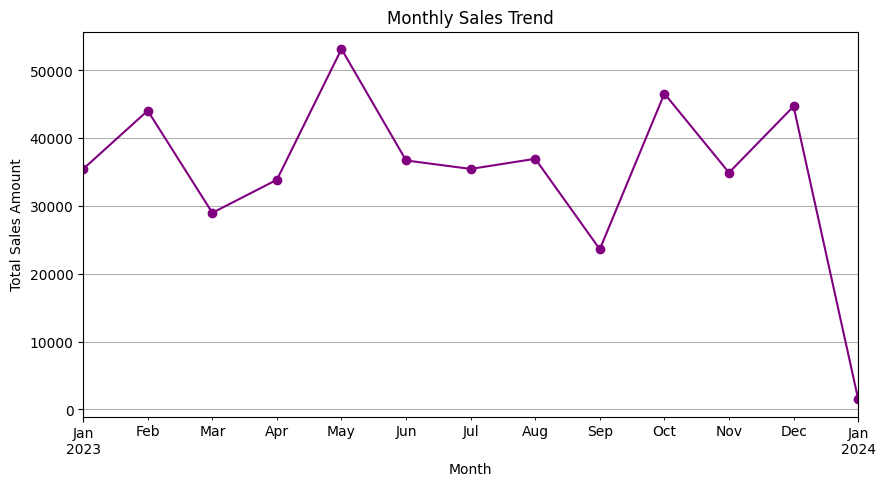

In [34]:
#line chart (Monthly Sales Trend)

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o',color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()


The monthly sales trend shows that sales fluctuate throughout the year with major peaks in **May, October, and December**. A sharp drop appears in **January 2024**, indicating significantly lower sales at the start of the new year.


# Customer and Product Analysis:

In [31]:
Totalsalesbyproduct=data.groupby('Product Category')['Total Amount'].sum()
Totalsalesbyproduct

,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


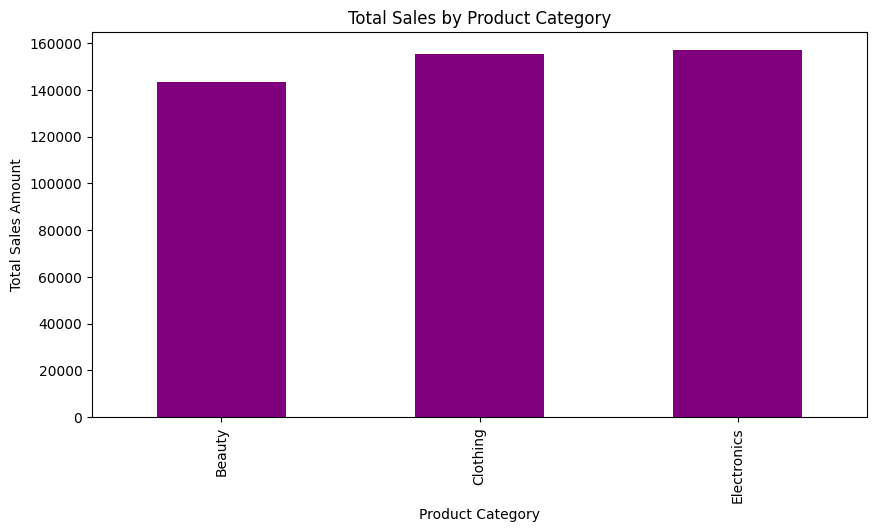

In [35]:
# Product Analysis:
# Bar chart (Total Sales by Product Category)
plt.figure(figsize=(10,5))
Totalsalesbyproduct.plot(kind='bar',color='purple')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.show()




The bar chart shows that Electronics has the highest total sales, followed closely by Clothing, while Beauty has the lowest but still strong sales performance. Overall, all three categories contribute significantly to total revenue with only moderate differences.

Customer Analysis:

In [71]:
bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 65]
labels = [
    "18-22", "23-27", "28-32", "33-37", "38-42",
    "43-47", "48-52", "53-57", "58-62", "63-64"
]
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)

In [69]:
AgeBin_sales = data.groupby('AgeBin')['Total Amount'].sum()
AgeBin_sales

/tmp/ipython-input-3333886397.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AgeBin_sales = data.groupby('AgeBin')['Total Amount'].sum()


,Total Amount
AgeBin,
18-22,69235
23-27,47350
28-32,38370
33-37,59930
38-42,46130
43-47,46720
48-52,47570
53-57,46410
58-62,45160


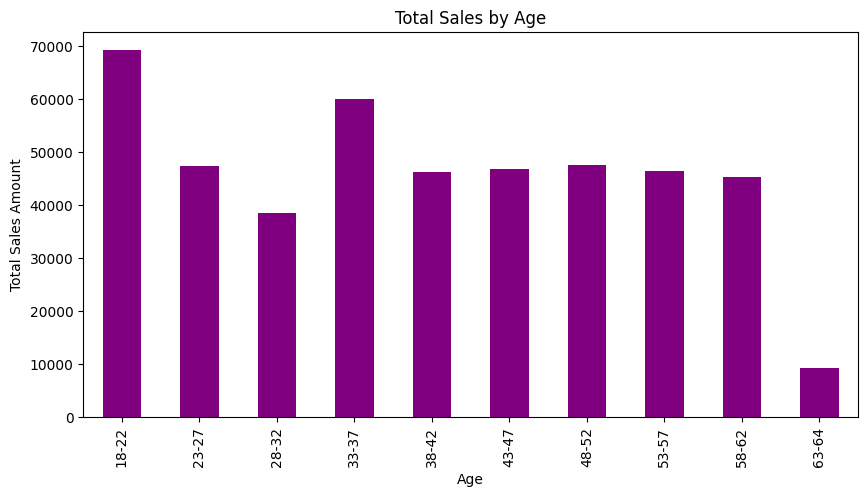

In [70]:
#Customer Analysis:
#bar chart (Total Sales by Age)
plt.figure(figsize=(10,5))
AgeBin_sales.plot(kind='bar',color='purple')
plt.title("Total Sales by Age")
plt.xlabel("Age")
plt.ylabel("Total Sales Amount")
plt.show()




Customers aged **18–22** contribute the highest sales, making them the most active spending group.
Sales remain fairly steady across middle age ranges, with a sharp drop only in the **63–64** age group.

In [72]:
gender_sales = data.groupby('Gender')['Total Amount'].sum()


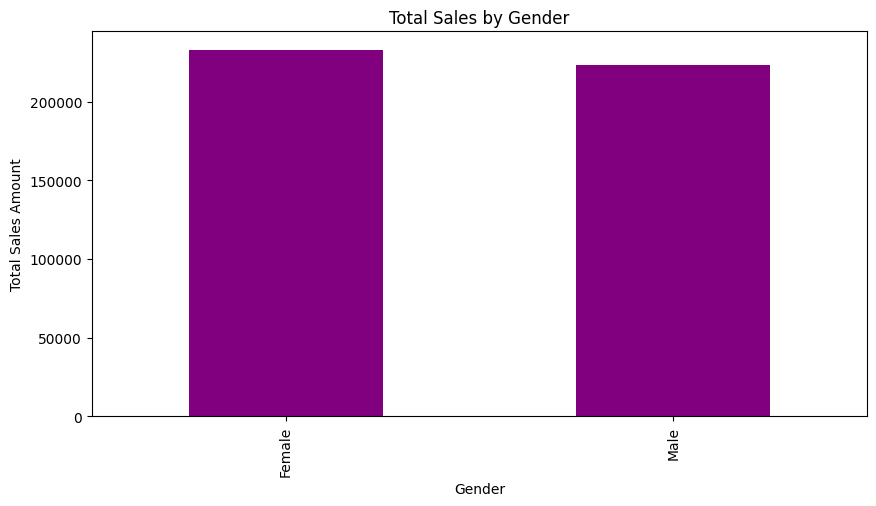

In [73]:
plt.figure(figsize=(10,5))
gender_sales.plot(kind='bar',color='purple')
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales Amount")
plt.show()

#

Both genders contribute almost equally to the total sales.


# Recommendations

1)Target the **18–22** age group more aggressively, as they generate the highest sales; consider student discounts, youth bundles, or social-media-driven promotions.

2)Improve engagement for older age groups (60+), where spending drops significantly—simpler product options or senior-friendly offers may help.

3)Promote high-performing product categories like Electronics and Clothing, as they generate the highest revenue; push festive bundles or loyalty points here.

4)Enhance marketing for Beauty products, as they have slightly lower sales—try influencer marketing or limited-time offers.

5)Focus equally on male and female customers, since both spend almost the same; create gender-balanced campaigns rather than targeting only one segment.